In [4]:
from urllib.request import urlopen, Request
import pandas_datareader as web
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
from datetime import date
import seaborn as sns
import pandas as pd
import numpy as np
import datetime
import talib
import re

sns.set_theme(context='paper', style='whitegrid', palette='husl', font='sans-serif', font_scale=1, color_codes=True, rc=None)
pd.options.display.max_columns = 999
pd.options.display.max_rows = 15

In [5]:
url = urlopen("https://en.wikipedia.org/wiki/List_of_S%26P_500_companies")
soup = BeautifulSoup(url.read(), 'lxml')
tbody = soup.tbody
tr = tbody.find_all('tr')
data = []
for t in tr:
    data.append(t.text.split('\n'))

raw_df = pd.DataFrame(data)
raw_df.columns = raw_df.iloc[0,:]
raw_df = raw_df.iloc[1:,:]
df = raw_df.iloc[:,1]

def find_ticker(argS):
    if argS in df.values:
        x = df[df==argS]
    return x

tk2find = 'AAPL'
#tkr = find_ticker(tk2find).values[0]
tkr = 'TSLA'

start = datetime.date(2020,1,1)
end = date.today()
df1 = web.DataReader(tkr, 'yahoo', start=start, end=end)

'Overlap Studies'

In [6]:
"""def allFuncs(dframe,*args,**kwargs):
    tadf = pd.DataFrame()
    
    def singleArgMavg(*args):
        x = talib.DEMA(dframe,*args)
        return x
    def multArgs(*args,**kwargs):
        x,y,z = talib.BBANDS(dframe,*args,**kwargs)
        return x,y,z
    tadf['DEMA'] = singleArgMavg(*args)
    tadf.assign(multArgs(*args,**kwargs)
    return tadf

a = allFuncs(df1['Adj Close'],15,nbdevup=2, nbdevdn=2, matype=0)
display(a)""" #do this later

"def allFuncs(dframe,*args,**kwargs):\n    tadf = pd.DataFrame()\n    \n    def singleArgMavg(*args):\n        x = talib.DEMA(dframe,*args)\n        return x\n    def multArgs(*args,**kwargs):\n        x,y,z = talib.BBANDS(dframe,*args,**kwargs)\n        return x,y,z\n    tadf['DEMA'] = singleArgMavg(*args)\n    tadf.assign(multArgs(*args,**kwargs)\n    return tadf\n\na = allFuncs(df1['Adj Close'],15,nbdevup=2, nbdevdn=2, matype=0)\ndisplay(a)"

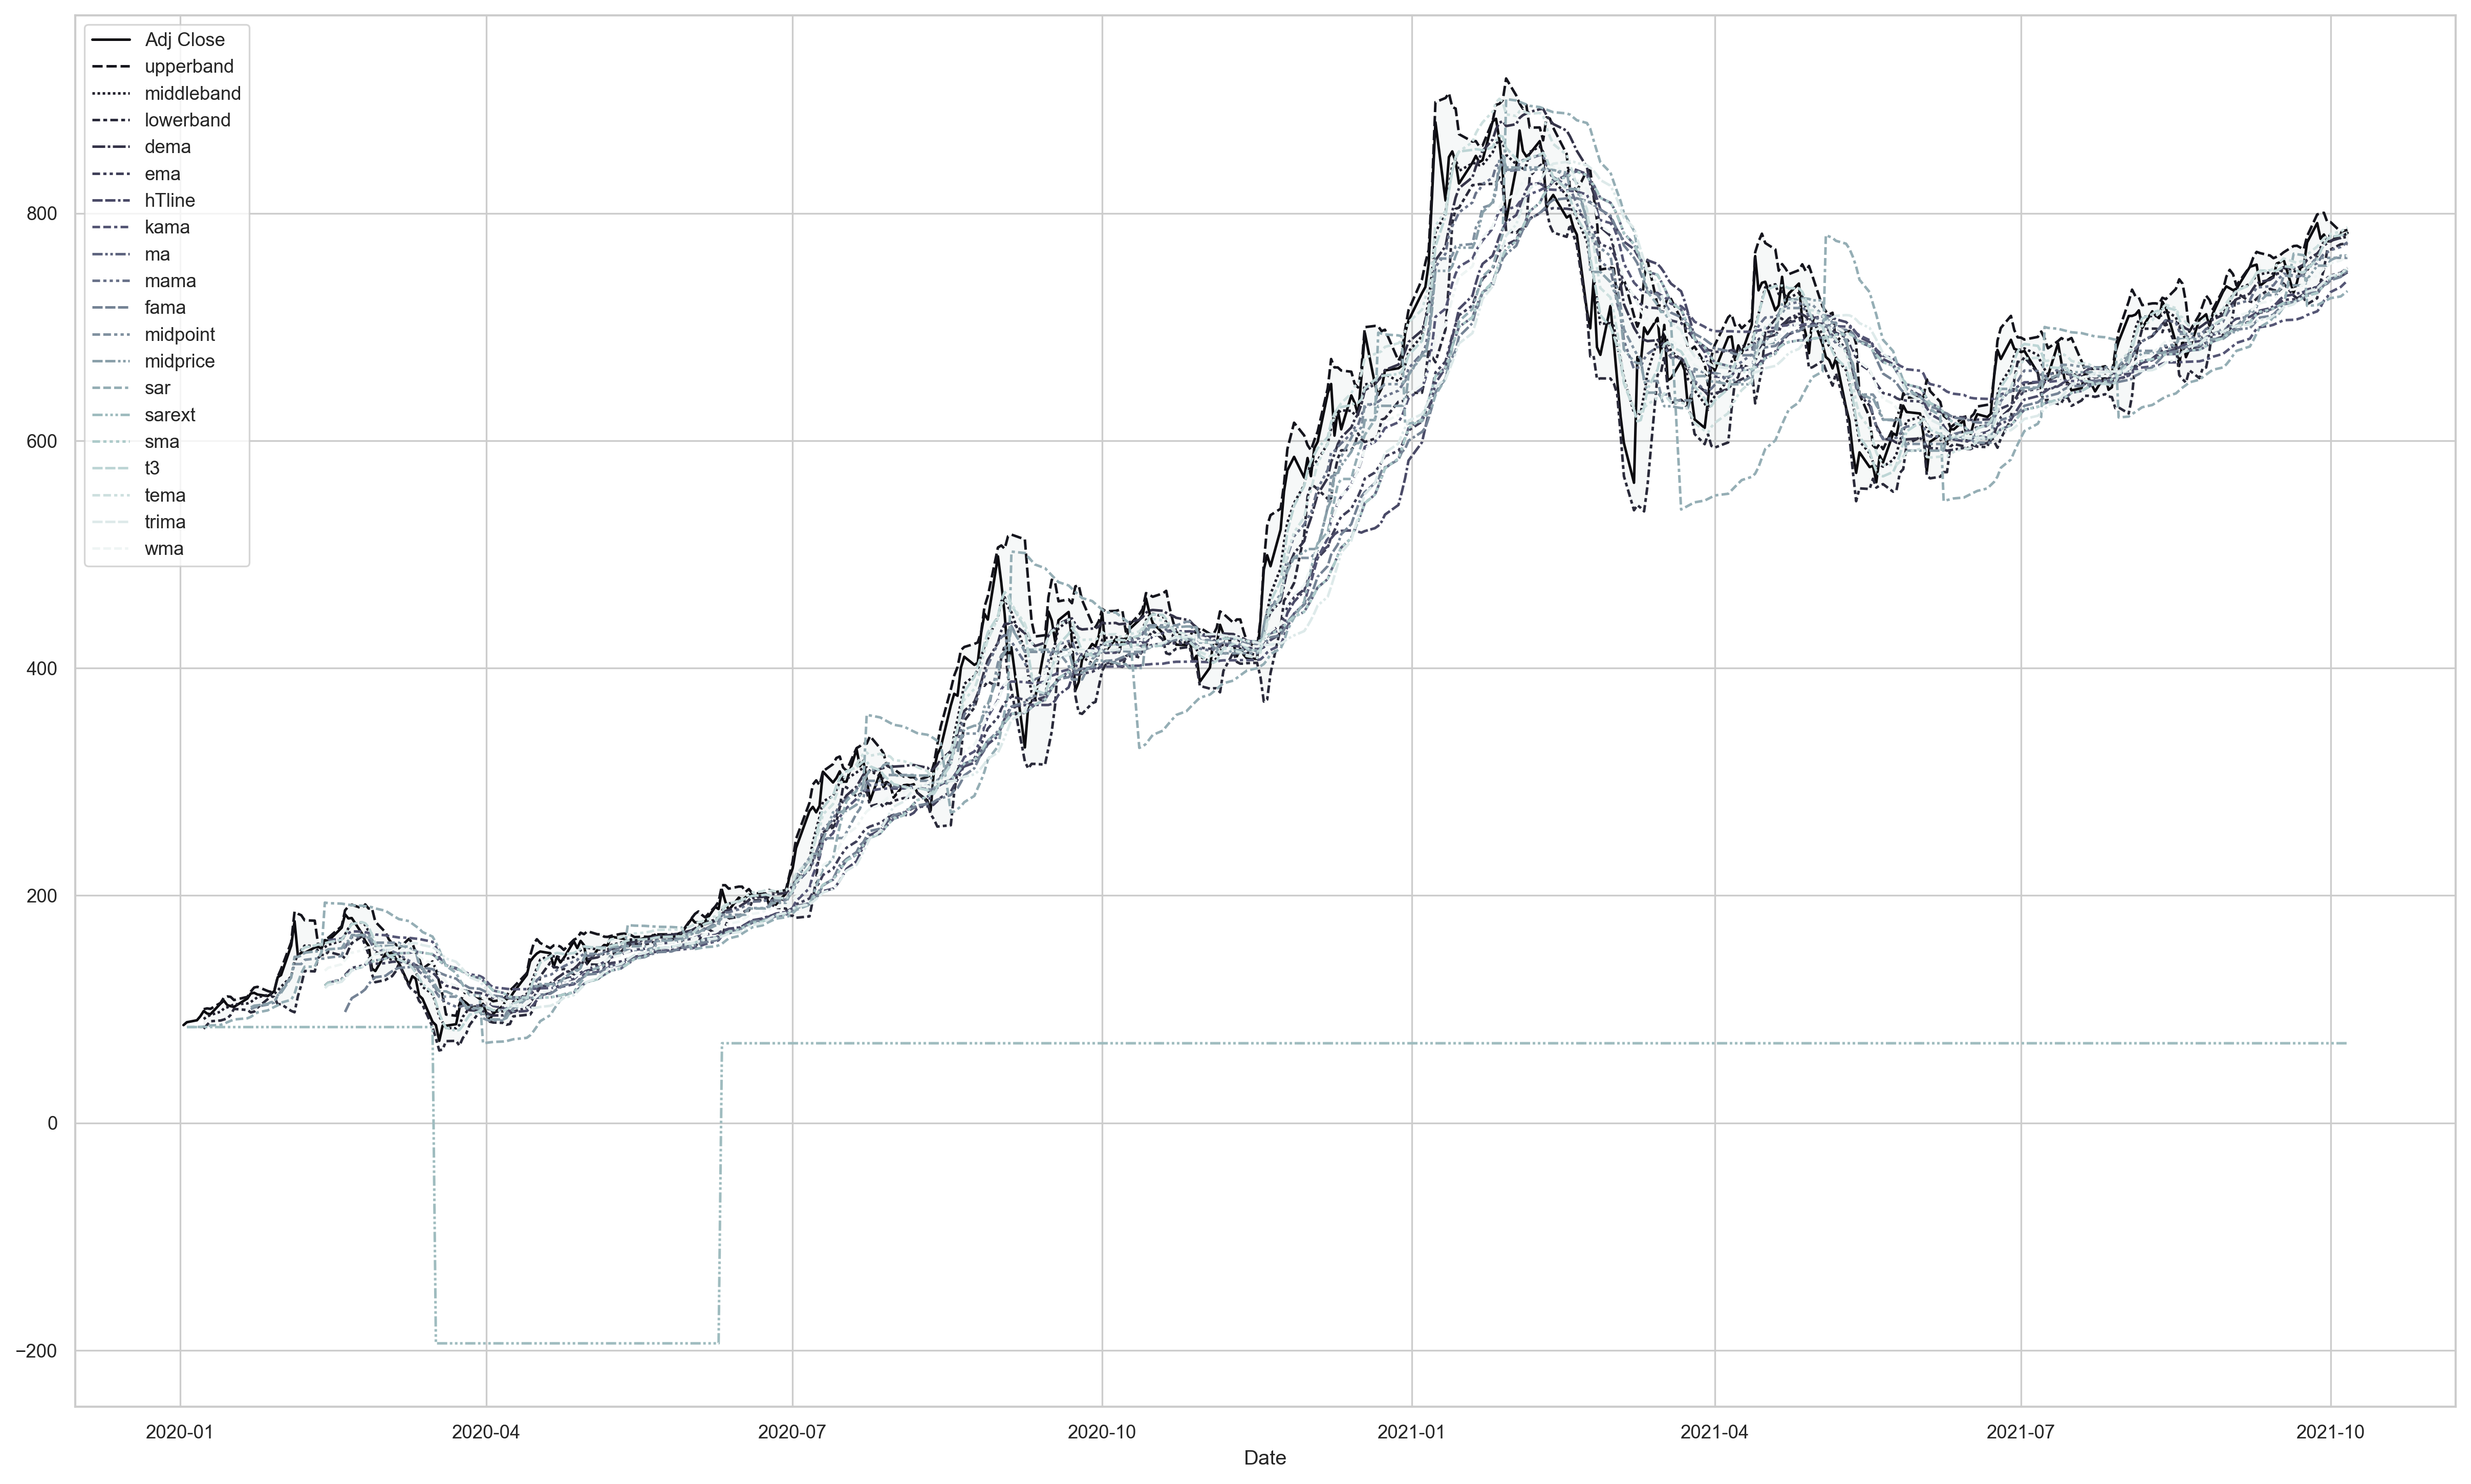

In [7]:
close = df1['Adj Close']
high = df1['High']
low = df1['Low']

#bollinger bands
upperband, middleband, lowerband = talib.BBANDS(close, timeperiod=5, nbdevup=2, nbdevdn=2, matype=0)
#Double exponential mavg
dema = talib.DEMA(close, timeperiod=30)
#EMA - Exponential Moving Average
ema = talib.EMA(close, timeperiod=30)
#HT_TRENDLINE - Hilbert Transform - Instantaneous Trendline
hTline = talib.HT_TRENDLINE(close)
#KAMA - Kaufman Adaptive Moving Average
kama = talib.KAMA(close, timeperiod=30)
#Moving avg
ma = talib.MA(close, timeperiod=30, matype=0)
#MAMA - MESA Adaptive Moving Average
mama, fama = talib.MAMA(close, fastlimit=0.1, slowlimit=0.2)
#MAVP - Moving average with variable period
#mavp = talib.MAVP(close, periods=5, minperiod=2, maxperiod=30, matype=0)
#MIDPOINT - MidPoint over period
midpoint = talib.MIDPOINT(close, timeperiod=14)
#MIDPRICE - Midpoint Price over period
midprice = talib.MIDPRICE(high, low, timeperiod=14)
#SAR - Parabolic SAR
sar = talib.SAR(high, low, acceleration=0.01, maximum=0.2)
#SAREXT - Parabolic SAR - Extended
sarext = talib.SAREXT(high, low, startvalue=0, offsetonreverse=0, accelerationinitlong=0, accelerationlong=0, accelerationmaxlong=0, accelerationinitshort=0, accelerationshort=0, accelerationmaxshort=0)
#SMA - Simple Moving Average
sma = talib.SMA(close, timeperiod=30)
#T3 - Triple Exponential Moving Average (T3)
t3 = talib.T3(close, timeperiod=5, vfactor=0.7)
#TEMA - Triple Exponential Moving Average
tema = talib.TEMA(close, timeperiod=30)
#TRIMA - Triangular Moving Average
trima = talib.TRIMA(close, timeperiod=30)
#WMA - Weighted Moving Average
wma = talib.WMA(close, timeperiod=30)

calcvars = [upperband, middleband, lowerband, dema, ema, hTline ,  kama ,  ma ,  mama ,  fama  ,  midpoint ,  midprice ,  sar ,  sarext ,  sma ,  t3 ,  tema ,  trima ,  wma ]
calcvars_names = ["upperband", "middleband", "lowerband", "dema", "ema", "hTline" ,  "kama" ,  "ma",  "mama" ,  "fama"  ,  "midpoint" ,  "midprice" ,  "sar" ,  "sarext" ,  "sma" ,  "t3" ,  "tema" ,  "trima" ,  "wma" ]

tf = pd.concat(calcvars, axis=1, keys=calcvars_names)
df = pd.concat([close,tf],axis=1)
plt.rcParams['figure.dpi'] = 300
plt.figure(figsize=(20, 12))
a2 = sns.lineplot(data=df, palette='bone')
a2.fill_between(df.index,df['upperband'],df['lowerband'], color = 'darkslategrey',alpha=0.04)
plt.show()

In [10]:
d3df = df[['Adj Close','upperband','middleband','lowerband','sma']]

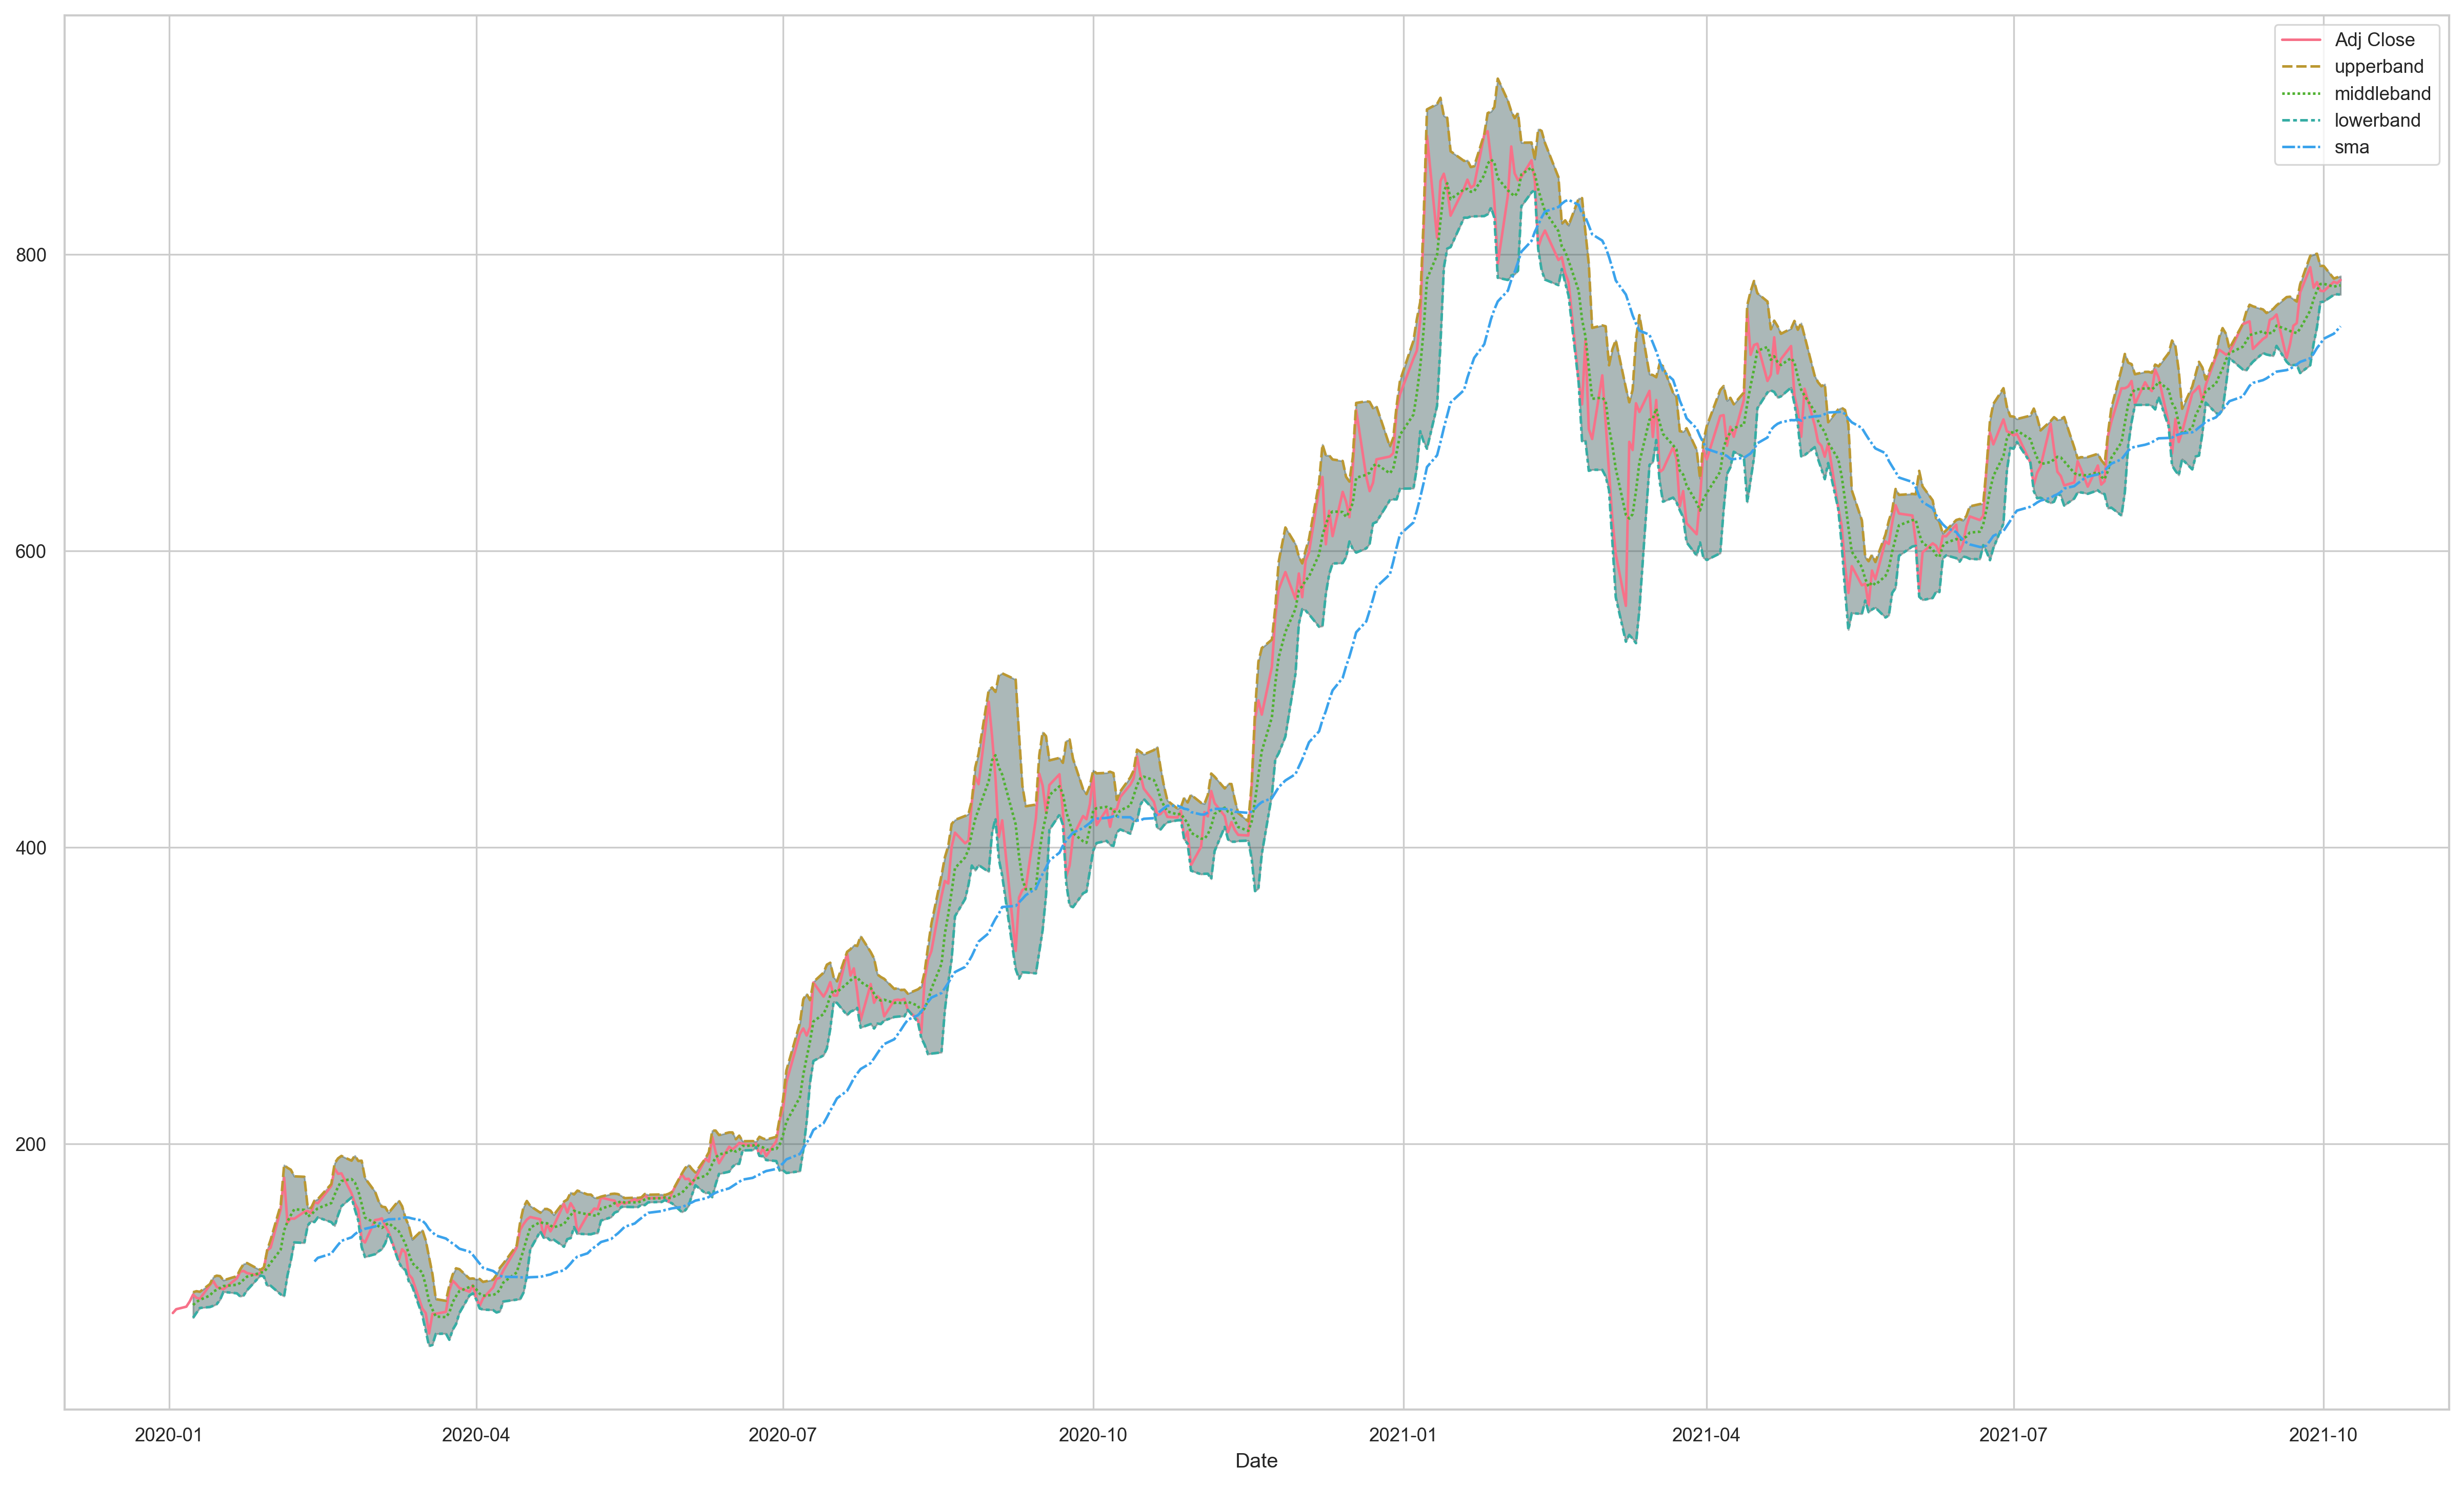

In [14]:
plt.figure(figsize=(20, 12))
a2 = sns.lineplot(data = d3df)
a2.fill_between(d3df.index,d3df['upperband'],d3df['lowerband'], color = 'darkslategrey',alpha=0.4)
plt.show()